## Objective

Visualizing the correlation table with matshow in Matplotlib, among other things!

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

In [2]:
# Import the dataset
df = pd.read_csv('datasets/Minimum Wage Data.csv')
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [3]:
# Set Year as index and States as columns 
act_min_wage = pd.DataFrame()

for name, group in df.groupby('State'):
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars': name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Department.Of.Labor.Cleaned.Low.Value.2020.Dollars']].rename(columns={'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars': name}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,NaN,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,NaN,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,NaN,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,NaN,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,NaN,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [4]:
# Create correlation matrix
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


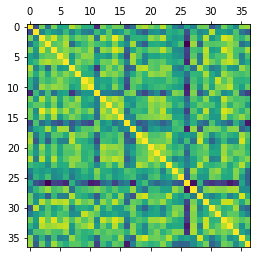

In [5]:
# Draft a graph of the correlation matrix
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

In [6]:
# Replace axis labels from numbers to States 
labels = [c[:2] for c in min_wage_corr.columns]
labels

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

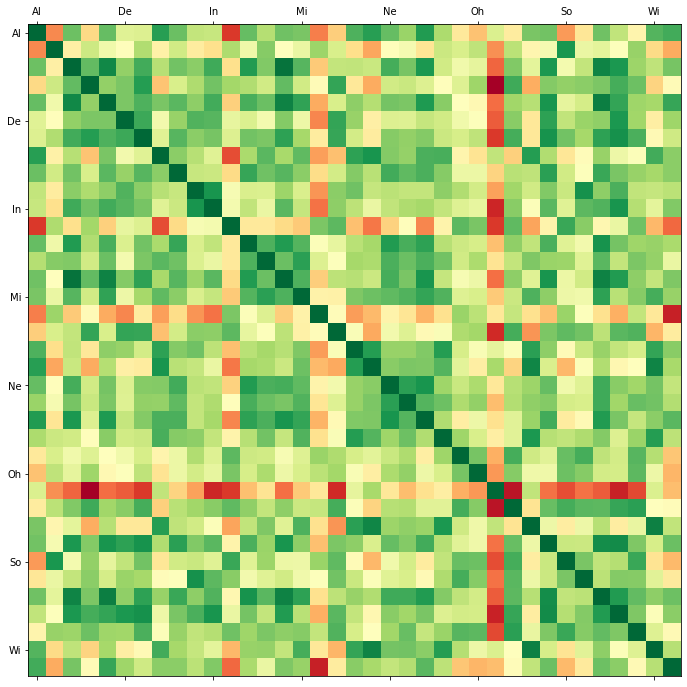

In [7]:
# Plot a custom graph for the correlation matrix
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

In [8]:
# Axis labels like Ne, Mi, etc are not distinct.
# Read HTML parses website and returns all dataframes
import pandas as pd

dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
dfs

[          State/District Abbreviation Postal Code
 0                Alabama         Ala.          AL
 1                 Alaska       Alaska          AK
 2                Arizona        Ariz.          AZ
 3               Arkansas         Ark.          AR
 4             California       Calif.          CA
 5               Colorado        Colo.          CO
 6            Connecticut        Conn.          CT
 7               Delaware         Del.          DE
 8   District of Columbia         D.C.          DC
 9                Florida         Fla.          FL
 10               Georgia          Ga.          GA
 11                Hawaii       Hawaii          HI
 12                 Idaho        Idaho          ID
 13              Illinois         Ill.          IL
 14               Indiana         Ind.          IN
 15                  Iowa         Iowa          IA
 16                Kansas        Kans.          KS
 17              Kentucky          Ky.          KY
 18             Louisiana      

In [9]:
# Get the State dataframe and discard the Territory dataframe
state_abbv = dfs[0]

# Save the State abbreviations to avoid multiple website requests
# index=False will tell CSV not to add index column as already present in data
state_abbv.to_csv('datasets/state_abbv.csv', index=False)

# index_col=0 while reading CSV will assign first column in CSV as index of the new DataFrame
state_abbv = pd.read_csv('datasets/state_abbv.csv', index_col=0)

state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [10]:
# Get State Postal Codes
abbv_dict = state_abbv[['Postal Code']].to_dict()
abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

In [11]:
# Clean the dictionary
abbv_dict = abbv_dict['Postal Code']
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [12]:
# Extract State codes as labels for graph in correlation matrix 
labels = [abbv_dict[c] for c in min_wage_corr.columns]
labels

KeyError: 'Guam'

In [13]:
# Assign value for missing State/s
abbv_dict['Guam'] = 'Gu'
labels = [abbv_dict[c] for c in min_wage_corr.columns]
labels

['AK',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'Gu',
 'HI',
 'ID',
 'IN',
 'KY',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SD',
 'UT',
 'VT',
 'WA',
 'WV',
 'WI',
 'WY']

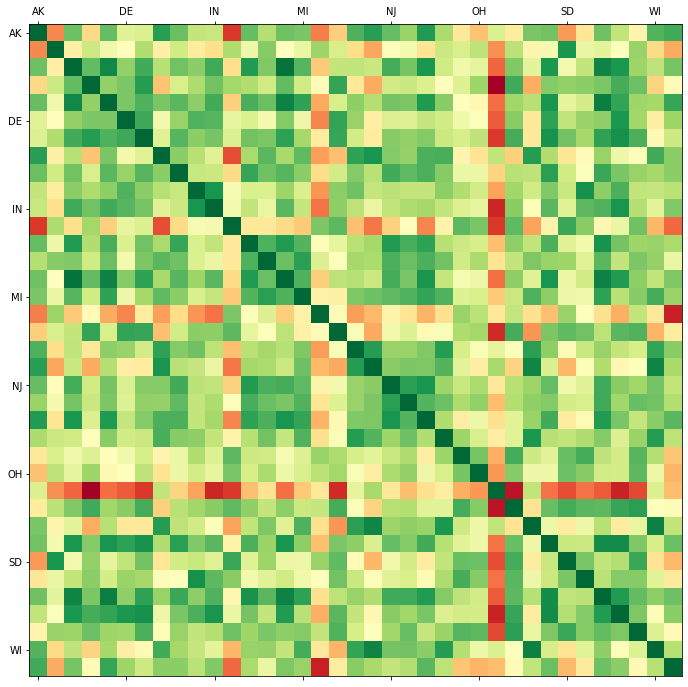

In [14]:
# Re-plot a custom graph for the correlation matrix
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)